# Introduction

> **Will it rain tomorrow?**

That is the question we will try to answer in this project, practicing machine learning.

## Context

A vacation of a group of friends is about to start and they will arrive at the Melbourne Airport tomorrow. They rented a place near the airport and they want to go on foot to the rented place to save money in the beginning of their trip. But, if it is raining, they will have to go there using a mean of transportation, since they do not want to get wet. So, they want to know if it is going to rain tomorrow around the Melbourne Airport to know if they need to schedule a shuttle bus to take them to the rented place.

---

### Project Objective

> **Find if it will tomorrow around the Melbourne Airport.**

---

## Process

This project will be divided into 3 parts:

1. Initial Analysis of the Variables
2. Baseline
3. **Development of the Machine Learning Model**


# Part 03 | Development of the Machine Learning Model

---


## Specific Objective

> **Develop the Final Logistic Regression Model**

---


## Premises

- The location is the **Melbourne Airport**.
- Today is **25/06/2017**.
- Right now is **nighttime**. Therefore, **not all features are available right now**.
- The features available are:
  - Maximum temperature
  - Evaporation
  - Sunshine
  - Rain Today
  - Rain Tomorrow
  - All the other variables that were measured at 9 AM and 3 PM


## Setup

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from yellowbrick.features import RFECV
from scipy.stats import uniform, gamma, beta, randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import StratifiedKFold

C:\Users\Leticia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Import the Dataset

In [2]:
# Import the dataset (Melborne already filtered)
df_ma = pd.read_csv('exported_df/complete_dataset.csv')

### Exploratory Data Analysis (EAD)

In [3]:
df_ma.columns

Index(['date', 'location', 'maxtemp', 'evaporation_final', 'sunshine_final',
       'humidity9am_final', 'humidity3pm_final', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm_final', 'temp9am', 'temp3pm', 'precipitation3pm',
       'precipitation9am', 'wind_speed9am_complete_final',
       'wind_speed3pm_complete', 'wind_dir9am_complete_final_int',
       'wind_dir3pm_complete_final_int', 'raintoday_int', 'raintomorrow_int'],
      dtype='object')

In [4]:
df_ma.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtemp,2947.0,20.519477,6.639235,8.400000,15.300000,19.200000,24.600000,46.800000
evaporation_final,2947.0,4.659654,3.321630,0.000000,2.200000,4.000000,6.400000,23.800000
sunshine_final,2947.0,6.419104,3.902773,0.000000,3.100000,6.600000,9.600000,13.900000
humidity9am_final,2947.0,69.969121,15.659936,11.000000,61.000000,71.000000,81.000000,100.000000
humidity3pm_final,2947.0,51.014252,17.793389,7.000000,40.000000,50.000000,62.000000,98.000000
pressure9am,2947.0,1018.037089,7.666151,989.700000,1013.100000,1018.200000,1023.200000,1039.300000
pressure3pm,2947.0,1016.236003,7.518912,988.200000,1011.300000,1016.600000,1021.400000,1036.000000
cloud9am,2947.0,5.238887,2.534074,0.000000,3.000000,7.000000,7.000000,8.000000
cloud3pm_final,2947.0,5.258229,2.361614,0.000000,3.000000,6.000000,7.000000,8.000000
temp9am,2947.0,14.142043,4.905283,3.300000,10.600000,13.500000,16.800000,35.400000


Some observations about the data:

- `maxtemp` (°C)
  - Minimum: 8.400000
  - Maximum: 46.80 - Too High<br>
    But this information it's true: http://www.bom.gov.au/climate/averages/tables/cw_086282.shtml
    
    <br>

- `precipitation9am`(mm)
  - Minimum: 30.174273
  - Maximum: -11.023931 - it's strange a precipitation value negative.<br>
  

#### Removing precipitation negative

In [5]:
#Análise da precipitação negativa de 9am:
print('Shape of precipitation9am:',df_ma['precipitation9am'].shape[0])

print('Quantidade de linhas com precipitation negativa:',df_ma.loc[df_ma['precipitation9am']<0].shape[0])

percentage = (df_ma.loc[df_ma['precipitation9am']<0].shape[0])/(df_ma['precipitation9am'].shape[0])
print('Porcentagem de linhas dropadas:',)

Shape of precipitation9am: 2947
Quantidade de linhas com precipitation negativa: 74
Porcentagem de linhas dropadas:


In [6]:
#Drop das linhas:
df_ma.drop(df_ma.loc[df_ma['precipitation9am']<0,'precipitation9am'].index, inplace=True)

In [7]:
#Nova Quantidade de linhas do DataSet
print('Nova quantidade de linhas:',df_ma.shape[0])

Nova quantidade de linhas: 2873


## Feature Selection

Applying the `Recursive Feature Elimination in Yellowbricks` method to find out the most relevant features.

###  Select columns

In [8]:
# Select columns:
#All columns were selected, except: location, date.
columns = ['maxtemp', 'evaporation_final','sunshine_final','humidity9am_final', 'humidity3pm_final', 
           'pressure9am', 'pressure3pm','cloud9am', 'cloud3pm_final', 'temp9am', 'temp3pm', 
           'precipitation3pm','precipitation9am', 'wind_speed9am_complete_final', 'wind_speed3pm_complete',
           'raintoday_int','wind_dir9am_complete_final_int', 'wind_dir3pm_complete_final_int']

X = df_ma[columns]
y = df_ma['raintomorrow_int']

### Definição do treino e teste:

In [9]:
#Definição manual do X_train e X_test:
#80% dataset para treino, 20% dataset para teste. Processo feito para evitar criar um modelo com dados do futuro.
train_len = int(df_ma.shape[0]*0.8) 
X_train = X.iloc[:train_len, :]
X_test = X.iloc[train_len:, :]
y_train = y[:train_len]
y_test = y[train_len:]

In [10]:
#Validando se o dataset foi corrigido corretamente:
print('Total of lines from dataframe:',df_ma.shape[0])
print('\n')
print(f'Total columns of X: {X_train.shape[0] + X_test.shape[0]}')
print(f'Total columns of y: {y_train.shape[0] + y_test.shape[0]}')

Total of lines from dataframe: 2873


Total columns of X: 2873
Total columns of y: 2873


### Yellow Brick

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

#Standard X_train
X_train_std = scaler.transform(X_train)

C:\Users\Leticia\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\Leticia\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


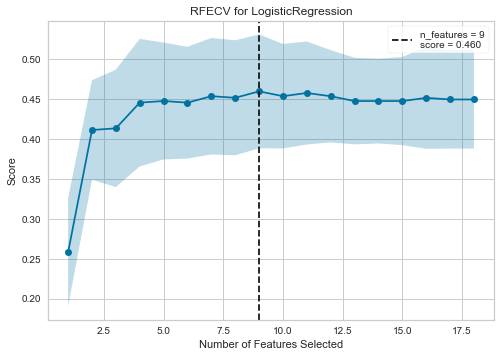

In [12]:
#Recursive Feature Elimination in Yellowbricks

from yellowbrick.features import RFECV
model = LogisticRegression()

visualizer = RFECV(model, scoring='recall')

visualizer.fit(X_train_std, y_train)        
visualizer.show()

In [13]:
visualizer.ranking_

array([ 1,  7,  1,  1,  1,  1,  1,  5,  1,  1,  9,  8,  6, 10,  2,  1,  4,
        3])

In [14]:
X_train.columns[visualizer.ranking_ == 1 ]

Index(['maxtemp', 'sunshine_final', 'humidity9am_final', 'humidity3pm_final',
       'pressure9am', 'pressure3pm', 'cloud3pm_final', 'temp9am',
       'raintoday_int'],
      dtype='object')

The features that are the **most relevant** for the model are:
- 'maxtemp';
- 'sunshine_final';
- 'humidity9am_final';
- 'humidity3pm_final';
- 'pressure9am';
- 'pressure3pm';
- 'cloud3pm_final';
- 'temp9am';
- 'raintoday_int'.

### Setup the model with relevant features

In [15]:
#Defining X and Y, using only the relevant features
X = df_ma[['maxtemp', 'sunshine_final', 'humidity9am_final', 'humidity3pm_final',
       'pressure9am', 'pressure3pm', 'cloud3pm_final', 'temp9am',
       'raintoday_int']]
y = df_ma['raintomorrow_int']

In [16]:
#Definição manual do X_train e X_test:
#80% dataset para treino, 20% dataset para teste. Processo feito para evitar criar um modelo com dados do futuro.
train_len = int(df_ma.shape[0]*0.8) 
X_train = X.iloc[:train_len, :]
X_test = X.iloc[train_len:, :]
y_train = y[:train_len]
y_test = y[train_len:]

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

#Standard X_train
X_train_std = scaler.transform(X_train)

#Standard X_test
X_test_std = scaler.transform(X_test)

### Coefficients

In [18]:
# Instance the model
logistic = LogisticRegression()
# Train the model
logistic.fit(X=X_train_std, y=y_train)

LogisticRegression()

In [19]:
# Instance the model
logistic = LogisticRegression()
# Train the model
logistic.fit(X=X_train_std, y=y_train)

# Checking the coefficients
pd.DataFrame(zip(X_train.columns, logistic.coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,humidity3pm_final,1.041118
1,pressure9am,0.801977
2,maxtemp,0.531372
3,cloud3pm_final,0.322818
4,raintoday_int,0.154096
5,humidity9am_final,-0.248987
6,temp9am,-0.351909
7,sunshine_final,-0.434522
8,pressure3pm,-1.706659


Interpretação:<br>
Os coeficientes afetam a probabilidade (de maneira indireta).Quanto maior o coeficiente, maior o impacto na probabilidade de chuva.
    
Insights:
- `pressure3pm` é o coeficiente mais influente, que gera um impacto negativo, diminuindo a chance da chuva ocorrer.
- `humidity3pm_final` é o segundo coeficiente mais influente, que afeta a probabilidade de maneira positiva.

## Hyper Parameters

Applying the `Hyper Parameters` into Analysis01 (Yellowbricks method to find out the most relevant features).<br>
Obs: We will use the cross validation `TimeSeriesSplit`, because the data it's on a time line and we can't use data from future to execute the validation.

In [20]:
# Instance the cross validation - TimeSeriesSplit because the time it's important
cv = TimeSeriesSplit(n_splits=5)

In [21]:
 logistic.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [22]:
import random
from sklearn.model_selection import GridSearchCV
# specify parameters and distributions to sample from

param_dist = {
    'C': gamma(1, loc=0, scale=0.1)
             }

n_iter_search = 10000
random_search = RandomizedSearchCV(logistic, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, verbose=True, 
                                   cv = TimeSeriesSplit(n_splits=5),
                                   scoring='recall',
                                   n_jobs=-1)

random_search.fit(X_train_std, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 3120 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 5920 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 9520 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 13920 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 19120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 25120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 31920 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 39520 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 47920 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 50000 out of 50000 | elapsed:  6.0min finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=LogisticRegression(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C28D42A7C0>},
                   scoring='recall', verbose=True)

In [23]:
random_search.best_params_

{'C': 0.9673921902504405}

In [24]:
random_search.best_estimator_

LogisticRegression(C=0.9673921902504405)

## Final model

Model with relevant coeficients and with the parameter C seted.

In [25]:
# Logistic
logistic = LogisticRegression(C=0.9571268323572962)

#Fit the model
logistic.fit(X_train_std, y_train)

LogisticRegression(C=0.9571268323572962)

### Coefficients

In [26]:
# Checking the coefficients
pd.DataFrame(zip(X_train.columns, logistic.coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,humidity3pm_final,1.039770
1,pressure9am,0.796945
2,maxtemp,0.530194
3,cloud3pm_final,0.322710
4,raintoday_int,0.153591
5,humidity9am_final,-0.248302
6,temp9am,-0.351040
7,sunshine_final,-0.434555
8,pressure3pm,-1.701554


Interpretação:<br>
Os coeficientes afetam a probabilidade (de maneira indireta).Quanto maior o coeficiente, mais impacto teremos na probabilidade de chuva.
    
Insights:
- `pressure3pm` é o coeficiente mais influente, que gera um impacto negativo, diminuindo a chance da chuva ocorrer.
- `humidity3pm_final` é o segundo coeficiente mais influente, que afeta a probabilidade de maneira positiva.

### Metric

In [27]:
# Function to calculate the metrics of the cross validation
def calculate_metrics_crossvalidation(X_train, y_train, model, cross_validation):
    precision_train = []
    precision_val = []   
    recall_train = []
    recall_val = []
    # Calculate metrics for training and validation sets
    for train_index, val_index in cross_validation.split(X=X_train):
        # Create sets for training and validation
        X_train_cv = pd.DataFrame(X_train).iloc[train_index]
        y_train_cv = y_train.iloc[train_index]
        X_val_cv = pd.DataFrame(X_train).iloc[val_index]
        y_val_cv = y_train.iloc[val_index]
        # Train the model
        model.fit(X_train_cv, y_train_cv)
        # Metrics
        ## Precision
        precision_train.append(precision_score(y_true=y_train_cv, y_pred=model.predict_proba(X_train_cv)[:,1]>0.3))
        precision_val.append(precision_score(y_true=y_val_cv, y_pred=model.predict_proba(X_val_cv)[:,1]>0.3))
        ## Recall
        recall_train.append(recall_score(y_true=y_train_cv, y_pred=model.predict_proba(X_train_cv)[:,1]>0.3))
        recall_val.append(recall_score(y_true=y_val_cv, y_pred=model.predict_proba(X_val_cv)[:,1]>0.3))
    # Calculate the mean for training and validation sets
    ## Precision
    precision_train_mean = np.mean(precision_train)
    precision_val_mean = np.mean(precision_val)
    precision_train_std = np.std(precision_train)
    precision_val_std = np.std(precision_val)
    ## Recall
    recall_train_mean = np.mean(recall_train)
    recall_val_mean = np.mean(recall_val)
    recall_train_std = np.std(recall_train)
    recall_val_std = np.std(recall_val)
    return (((precision_train_mean, precision_train_std), (precision_val_mean, precision_val_std)), ((recall_train_mean, recall_train_std), (recall_val_mean, recall_val_std)))

#### Train and Validation

In [28]:
# Create a dataframe for the metrics
df_metrics_train = pd.DataFrame(columns=['model', 
                                   'precision_train_mean', 'precision_train_std', 'precision_val_mean', 'precision_val_std', 
                                   'recall_train_mean', 'recall_train_std', 'recall_val_mean', 'recall_val_std'])
# Add row
row_values = {'model': 'final',
              'precision_train_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                        model=logistic, cross_validation=cv)[0][0][0],
              'precision_train_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                       model=logistic, cross_validation=cv)[0][0][1],
              'precision_val_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                      model=logistic, cross_validation=cv)[0][1][0],
              'precision_val_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                     model=logistic, cross_validation=cv)[0][1][1],
              'recall_train_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                     model=logistic, cross_validation=cv)[1][0][0],
              'recall_train_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                    model=logistic, cross_validation=cv)[1][0][1],
              'recall_val_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                   model=logistic, cross_validation=cv)[1][1][0],
              'recall_val_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                  model=logistic, cross_validation=cv)[1][1][1]}
df_metrics_train = df_metrics_train.append(row_values, ignore_index=True)
# Check the result
df_metrics_train.T

,0
model,final
precision_train_mean,0.572471
precision_train_std,0.00284175
precision_val_mean,0.551483
precision_val_std,0.0291679
recall_train_mean,0.676271
recall_train_std,0.0100086
recall_val_mean,0.628428
recall_val_std,0.0540461


Insights:
- The data obteined it's consistent, because the mean is high and the standard deviation is low;
- The group of friends prefer to not want into rain, so, our capture tax must be greather. But, they also don't want to spend without necessity and demand for a good value of precision.
> With this cenary, we have good values:
~65% of recall and ~55% of precision

#### Test

In [29]:
# Create a dataframe for the metrics
df_metrics_test = pd.DataFrame(columns=['model', 'precision_test', 'recall_test'])

# Add row
row_values = {'model': 'final',
              'precision_test': precision_score(y_true=y_test, y_pred=logistic.predict_proba(X_test_std)[:,1]>0.3),
              'recall_test': recall_score(y_true=y_test, y_pred=logistic.predict_proba(X_test_std)[:,1]>0.3)}
df_metrics_test = df_metrics_test.append(row_values, ignore_index=True)
# Check the result
df_metrics_test.T

,0
model,final
precision_test,0.566434
recall_test,0.648


Insights:

Closer metrics on test, validation and train.

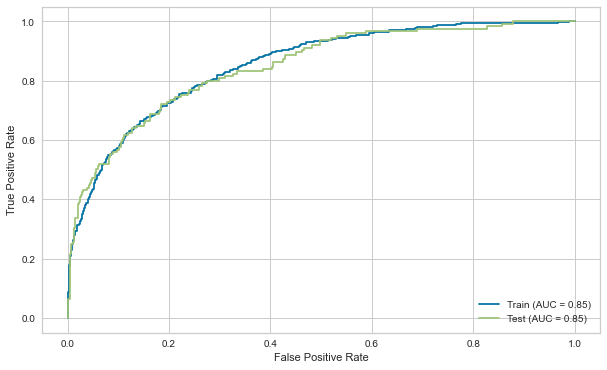

In [30]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=(10,6))

plot_roc_curve(estimator=logistic, X=X_train_std, y=y_train, ax=ax, name='Train')
plot_roc_curve(estimator=logistic, X=X_test_std, y=y_test, ax=ax, name='Test');

Insights:

> AUC of test and train are closer;<br>
> Also, the values are good (closer than 1).

## Will it rain tomorrow?

- Today it's 25/07/2020
- Will it rain on 26/07/2020?

In [31]:
df_ma_today = pd.read_csv('exported_df/today_dataset.csv')
df_ma_today

,date,location,maxtemp,evaporation_final,sunshine_final,humidity9am_final,humidity3pm_final,pressure9am,pressure3pm,cloud9am,...,temp9am,temp3pm,precipitation3pm,precipitation9am,wind_speed9am_complete_final,wind_speed3pm_complete,wind_dir9am_complete_final_int,wind_dir3pm_complete_final_int,raintoday_int,raintomorrow_int
0,2017-06-25,MelbourneAirport,13.9,2.8,3.8,72.0,58.0,1017.8,1015.5,7.0,...,8.1,12.2,11,11.477725,26.0,13.0,0,14,0,0


In [32]:
X_today = df_ma_today[['maxtemp', 'sunshine_final', 'humidity9am_final', 'humidity3pm_final',
       'pressure9am', 'pressure3pm', 'cloud3pm_final', 'temp9am',
       'raintoday_int']]
y_today= df_ma_today['raintomorrow_int']

In [33]:
# Instance the class (standard)
scaler = StandardScaler()

# Train the 'scaler'
scaler.fit(X_today)

# Standardize the variables - to convert for the same scale
X_test_std  = scaler.transform(X_today)

logistic.predict_proba(X_test_std)

array([[0.86952819, 0.13047181]])

- The chance of **not rain** tomorrow it's: 0.86950519;
- The chance of **rain tomorrow** it's: 0.13049481;

In [34]:
if (logistic.predict_proba(X_test_std)[0][0]>logistic.predict_proba(X_test_std)[0][1]):
    print("It will not rain tomorrow! The group could go on foot!")
else:
    print("It will rain tomorrow! They should use some type of transportation!")

It will not rain tomorrow! The group could go on foot!
